In [491]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, log_loss, make_scorer, recall_score, accuracy_score, precision_score, f1_score, cohen_kappa_score,roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn import svm
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity 
from scipy.stats import pearsonr


In [492]:
df_tourney_all_games =  pd.read_pickle('df_tourney_all_games')
df_tourney_all_games = df_tourney_all_games[df_tourney_all_games['Season'] != 2004]
upsets = df_tourney_all_games[df_tourney_all_games['upset'] == True]
df_avgs = pd.read_pickle('df_avgs_w_l')
df_tourney_teams = df_avgs[df_avgs['seed'] > 0].reset_index(drop=True)
df_tourney_teams = df_tourney_teams.astype({'rpi': float, 'seed': int})

In [493]:
upset_run_wins = upsets[(upsets['tourn_round'] == 64) & (upsets['tourny_wins'] > 1)]['point_diff'].mean()
upset_wins = upsets[(upsets['tourn_round'] == 64)]['point_diff'].mean()

run_wins = df_tourney_all_games[(df_tourney_all_games['tourn_round'] == 64) & (df_tourney_all_games['tourny_wins'] > 1)]['point_diff'].mean()
normal_wins = df_tourney_all_games[(df_tourney_all_games['tourn_round'] == 64)]['point_diff'].mean()

print('An average margin of victory in the first round is: %.2f' % normal_wins)
print('An average margin of victory in the first round for a team that makes it to sweet 16: %.2f' % run_wins)
print('----------------------------------------------------------------------------------------------------')
print('An average margin of victory in the first round for an underdog is: %.2f' % upset_wins)
print('An average margin of victory in the first round for an underdog team that makes it to sweet 16 is: %.2f' % upset_run_wins)


An average margin of victory in the first round is: 12.60
An average margin of victory in the first round for a team that makes it to sweet 16: 15.10
----------------------------------------------------------------------------------------------------
An average margin of victory in the first round for an underdog is: 8.26
An average margin of victory in the first round for an underdog team that makes it to sweet 16 is: 8.33


In [494]:
upset_run_wins = upsets[(upsets['tourny_wins'] > 1)]['point_diff'].mean()
upset_wins = upsets['point_diff'].mean()

print('An average margin of victory in ALL GAMES for an underdog is: %.2f' % upset_wins)
print('An average margin of victory in ALL GAMES for an underdog team that makes it to sweet 16 is: %.2f' % upset_run_wins)


An average margin of victory in ALL GAMES for an underdog is: 8.34
An average margin of victory in ALL GAMES for an underdog team that makes it to sweet 16 is: 8.39


These are the teams we really care about. These are the teams from non-power conferences that made it to at least the sweet 16 (win 2 games). None have made it past the final 4 though. The first round margin of victory does not have much to do with how far the team will go.

In [513]:
df_tourny_wins_features = df_tourney_teams[['seed', 'win_pct','shoot_eff', 'score_op', 'off_rtg', 'def_rtg', 'sos', 'efg_pct', 'to_poss', 'orb_pct', 'ft_rate', 'reb_pct', 'ts_pct', 'ast_rtio', 'blk_pct', 'stl_pct', '3pta_pct', 'tourny_wins', 'rpi']]
for feature in df_tourny_wins_features.columns:
    x = df_tourney_wins_features[feature]
    y = df_tourney_wins_features['tourny_wins']
    corr, _ = pearsonr(x, y)
    print('%s: %.3f' % (feature, corr))
x = df_tourny_wins_features['seed']
y = df_tourny_wins_features['rpi']
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

seed: -0.598
win_pct: 0.405
shoot_eff: 0.084
score_op: 0.111
off_rtg: 0.215
def_rtg: -0.228
sos: 0.466
efg_pct: 0.104
to_poss: -0.185
orb_pct: 0.172
ft_rate: -0.083
reb_pct: 0.110
ts_pct: 0.084
ast_rtio: 0.138
blk_pct: 0.203
stl_pct: 0.093
3pta_pct: -0.055
tourny_wins: 1.000
rpi: 0.511
Pearsons correlation: -0.886


In [497]:
df_tourny_wins_features = pd.get_dummies(df_tourny_wins_features, columns = ['seed'])

X = df_tourny_wins_features.drop('tourny_wins', axis=1)
y = df_tourny_wins_features.tourny_wins

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

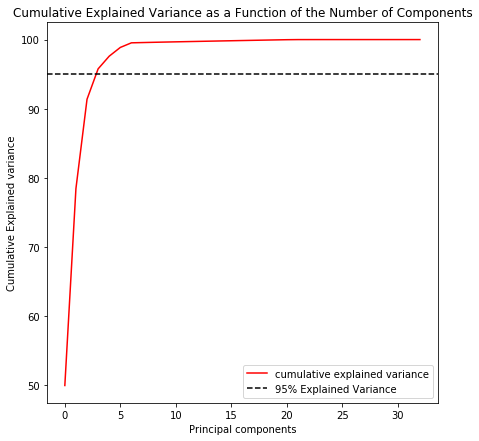

In [498]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(7, 7))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best');

Performing model optimizations...

Estimator: Logistic Regression


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

Best params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Best training accuracy: 0.267
Test set accuracy score for best params: 0.566 

Estimator: Logistic Regression w/PCA
Best params: {'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Best training accuracy: 0.254
Test set accuracy score for best params: 0.547 

Estimator: Random Forest


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best params: {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 8}
Best training accuracy: 0.256
Test set accuracy score for best params: 0.571 

Estimator: Random Forest w/PCA


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best params: {'clf__criterion': 'gini', 'clf__max_depth': 8, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 5}
Best training accuracy: 0.269
Test set accuracy score for best params: 0.547 

Estimator: Support Vector Machine


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best params: {'clf__C': 2, 'clf__kernel': 'linear'}
Best training accuracy: 0.246
Test set accuracy score for best params: 0.557 

Estimator: Support Vector Machine w/PCA


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best params: {'clf__C': 1, 'clf__kernel': 'rbf'}
Best training accuracy: 0.233
Test set accuracy score for best params: 0.552 

Classifier with best test set accuracy: Random Forest


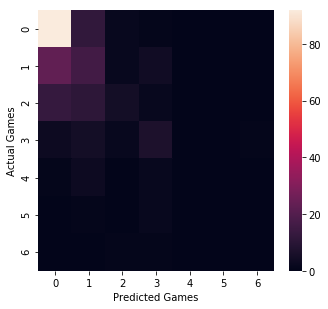

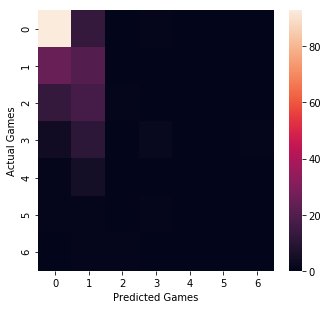

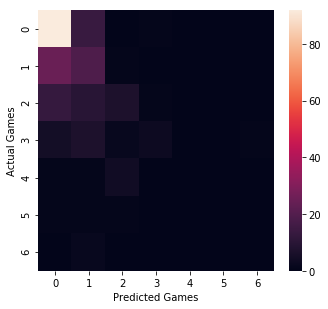

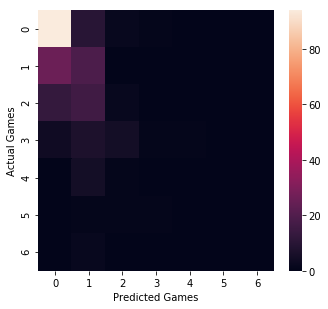

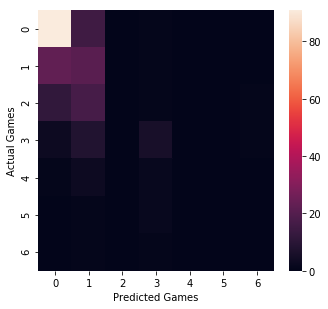

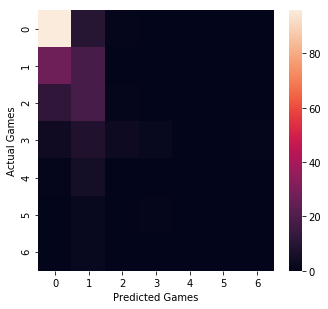

In [499]:
pipe_lr = Pipeline([('scl', StandardScaler()),
            ('clf', LogisticRegression(random_state=42, multi_class='multinomial'))])

pipe_lr_pca = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=5)),
            ('clf', LogisticRegression(random_state=42, multi_class='multinomial'))])

pipe_rf = Pipeline([('scl', StandardScaler()),
            ('clf', RandomForestClassifier(random_state=42))])

pipe_rf_pca = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=5)),
            ('clf', RandomForestClassifier(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),
            ('clf', svm.SVC(random_state=42))])

pipe_svm_pca = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=5)),
            ('clf', svm.SVC(random_state=42))])

param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]
jobs = -1
scorers = {
    'cohen_kappa_score': make_scorer(cohen_kappa_score)
}

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
        'clf__min_samples_leaf': param_range,
        'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}]

grid_params_lr = [{'clf__penalty': ['l2'],
        'clf__C': param_range_fl,
        'clf__solver': ['lbfgs']}] 

grid_params_svm = [{'clf__kernel': ['linear', 'poly', 'rbf'], 
        'clf__C': param_range}]

gs_lr = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring=scorers,
            refit='cohen_kappa_score',
            cv=10) 

gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,
            param_grid=grid_params_lr,
            scoring=scorers,
            refit='cohen_kappa_score',
            cv=10)

gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring=scorers,
            refit='cohen_kappa_score',
            cv=10, 
            n_jobs=jobs)

gs_rf_pca = GridSearchCV(estimator=pipe_rf_pca,
            param_grid=grid_params_rf,
            scoring=scorers,
            refit='cohen_kappa_score',
            cv=10, 
            n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=grid_params_svm,
            scoring=scorers,
            refit='cohen_kappa_score',
            cv=10,
            n_jobs=jobs)

gs_svm_pca = GridSearchCV(estimator=pipe_svm_pca,
            param_grid=grid_params_svm,
            scoring=scorers,
            refit='cohen_kappa_score',
            cv=10,
            n_jobs=jobs)

# List of pipelines for ease of iteration
grids = [gs_lr, gs_lr_pca, gs_rf, gs_rf_pca, gs_svm, gs_svm_pca]
# grids = [gs_svm]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA', 
        2: 'Random Forest', 3: 'Random Forest w/PCA', 
        4: 'Support Vector Machine', 5: 'Support Vector Machine w/PCA'}
# grid_dict = {0: 'Support Vector Machine'}

print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    gs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
#     display(gs.best_estimator_.named_steps["clf"].feature_importances_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    view = X_test.copy()
    view['pred'] = y_pred
    view['real'] = y_test
#     display(view)
    
    # Model evaluation metrics:
    confusion_mtrx = confusion_matrix(y_test, y_pred)
    
    # Plot all metrics in a grid of subplots:
    fig = plt.figure(figsize=(12, 12))
    grid = plt.GridSpec(2, 4, wspace=0.75, hspace=0.5)
    
    # Top-left plot - confusion matrix:
    plt.subplot(grid[0, :2])
    sns.heatmap(confusion_mtrx, fmt='')
    plt.xlabel('Predicted Games')
    plt.ylabel('Actual Games');
    
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx

print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Classifier with best test set accuracy: Random Forest. Accuracy of 0.571. This is of course an extremely difficult task because it is trying to predict the number of wins just based off a few attributes of one team. It does not take into account the opponents.

This is also a imbalanced dataset having 32 teams at 0, 16 at 1 and so forth until 1 team with 6 wins. That is why I selected the cohen kappa score to measure the fit of the models during training. I use accuracy for the test set to make the results easier to interpret. Theoretically a baseline of always predicting 0 for a team will result in 50% accuracy of course this will depend on the how the dataset is split up. So 57.1% is not too bad.

In the future a boosting method could be used to simulate more data of teams with more wins (3+ win teams) since there are not many training examples for the model to learn what these teams generally look like.

In [500]:
df_tourny_team_features = df_tourney_teams[features]
df_tourny_team_features.drop('tourny_wins', axis = 1, inplace=True)
normalized_df=(df_tourny_team_features-df_tourny_team_features.mean())/df_tourny_team_features.std()
df_normalized_small = normalized_df['off_rtg def_rtg rpi'.split()]
#     df_normalized_small = normalized_df
item_similarity = cosine_similarity(df_normalized_small, df_normalized_small)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [501]:
def get_team_comp(team_name, year, detailed = True):
   
    season = year

    idx = np.argsort(item_similarity[df_tourney_teams[(df_tourney_teams['TeamName'] == team_name) & (df_tourney_teams['Season'] == season)].index[0]], axis=None)[-11:-1]
    
    print('Expected:')
    print(df_tourney_teams.iloc[idx][['tourny_wins', 'seed']].mean())
    print('-----------------')
    print('Real Results:')
    print(df_tourney_teams[(df_tourney_teams['TeamID'] == team_id) & (df_tourney_teams['Season'] == season)][['TeamName', 'ConfName','tourny_wins', 'seed']])

    
    if (detailed == True):
        print('-----------------')
        print('Most Similar Teams:')
        display(df_tourney_teams.iloc[idx][['Season', 'TeamName', 'ConfName', 'tourny_wins', 'seed']])
    print('////////////////////////')


In [502]:
get_team_comp('Kansas', 2005, False)
get_team_comp('Kansas', 2015, False)
get_team_comp('Kansas', 2017, False)

Expected:
tourny_wins    1.4
seed           4.2
dtype: float64
-----------------
Real Results:
    TeamName           ConfName  tourny_wins  seed
144   Kansas  Big 12 Conference          0.0     3
////////////////////////
Expected:
tourny_wins    0.5
seed           7.0
dtype: float64
-----------------
Real Results:
    TeamName           ConfName  tourny_wins  seed
810   Kansas  Big 12 Conference          1.0     2
////////////////////////
Expected:
tourny_wins    1.3
seed           2.7
dtype: float64
-----------------
Real Results:
    TeamName           ConfName  tourny_wins  seed
939   Kansas  Big 12 Conference          3.0     1
////////////////////////


Sometimes it hits, and sometimes it's a big wiff. 2 and 3 are dead on but 1 is wayyyy off.

In [503]:
def calc_expected_wins(fav_seed_id, und_seed_id, season):
    fav_idx = df_tourney_teams[(df_tourney_teams['TeamID'] == fav_seed_id) & (df_tourney_teams['Season'] == season)].index[0]
    idx = np.argsort(item_similarity[fav_idx], axis=None)[-11:-1]
    fav_expected_wins = df_tourney_teams.iloc[idx][['tourny_wins']].mean()
    
    und_idx = df_tourney_teams[(df_tourney_teams['TeamID']== und_seed_id) & (df_tourney_teams['Season'] == season)].index[0]
    idx = np.argsort(item_similarity[und_idx], axis=None)[-11:-1]
    und_expected_wins = df_tourney_teams.iloc[idx][['tourny_wins']].mean()
    
    return (fav_expected_wins, und_expected_wins)
    
def calc_expected_dif(row):
    w_id = row.WTeamID
    l_id = row.LTeamID
    season = row.Season
    
    #This is an upset
    if(row.Wseed > row.Lseed):
        fav_exp_wins, und_exp_wins = calc_expected_wins(l_id, w_id, season)
    else:
        fav_exp_wins, und_exp_wins = calc_expected_wins(w_id, l_id, season)
        
    return fav_exp_wins - und_exp_wins

In [504]:
df_tourney_all_games['diff'] = df_tourney_all_games.apply(calc_expected_dif, axis=1)

In [523]:
wrong = len(df_tourney_all_games[(df_tourney_all_games['diff'] < 0) & (df_tourney_all_games['upset'] == False) & (df_tourney_all_games['tourn_round'] == 64)])
correct = len(df_tourney_all_games[(df_tourney_all_games['diff'] < 0) & (df_tourney_all_games['upset'] == True) & (df_tourney_all_games['tourn_round'] == 64)])
print('Number of correctly predicted upsets: ' + str(correct))
print('Incorrectly: ' + str(wrong))
print('Percentage Correct: ' + str(correct / (correct + wrong))[:5])


Number of correctly predicted upsets: 41
Incorrectly: 41
Percentage Correct: 0.5


In [521]:

tot_upsets = df_tourney_all_games[df_tourney_all_games['tourn_round'] == 64]['upset'].agg([np.sum])[0]
tot_games = df_tourney_all_games[df_tourney_all_games['tourn_round'] == 64].shape[0]
print('Number of upsets: ' + str(tot_upsets))
print('Total Games: ' + str(tot_games))
print('Percentage of Upsets: ' + str(tot_upsets / (tot_games))[:5])

Number of upsets: 126
Total Games: 480
Percentage of Upsets: 0.262


A common baseline is to always select the most common outcome, but in this case we are interested in locating upsets. So a selection would be to compare against the upset rate. The upset rate in the round of 64 is 26.2% whereas the targeted games is 50%. It's not the largest sample size but is a good indication that this could work in targetting games with potential upsets.

In [483]:
df_tourney_all_games[(df_tourney_all_games['diff'] < -0) & (df_tourney_all_games['tourn_round'] == 64)].sort_values(by='diff')

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,tourn_round,Wseed,Lseed,WTeamName,WConfName,LTeamName,LConfName,point_diff,upset,seed_dif,tourny_wins,diff
695,2011,136,1139,60,1330,58,N,0,64,8,9,Butler,Horizon League,Old Dominion,Colonial Athletic Association,2,False,-1,5,-1.9
736,2011,136,1243,73,1429,68,N,0,64,5,12,Kansas St,Big 12 Conference,Utah St,Western Athletic Conference,5,False,-7,1,-1.6
706,2003,136,1163,58,1140,53,N,0,64,5,12,Connecticut,Big East Conference,BYU,Mountain West Conference,5,False,-7,2,-1.3
909,2010,137,1338,89,1324,66,N,0,64,3,14,Pittsburgh,Big East Conference,Oakland,Summit League,23,False,-11,1,-1.2
901,2014,136,1338,77,1160,48,N,0,64,9,8,Pittsburgh,Atlantic Coast Conference,Colorado,Pacific-12 Conference,29,True,1,1,-1.2
219,2007,137,1345,72,1112,63,N,0,64,9,8,Purdue,Big Ten Conference,Arizona,Pacific-10 Conference,9,True,1,1,-1.1
414,2010,136,1320,69,1424,66,N,0,64,9,8,Northern Iowa,Missouri Valley Conference,UNLV,Mountain West Conference,3,True,1,2,-1.1
93,2012,137,1153,65,1400,59,N,0,64,6,11,Cincinnati,Big East Conference,Texas,Big 12 Conference,6,False,-5,2,-1.1
458,2017,137,1348,84,1166,72,N,0,64,11,6,Rhode Island,Atlantic 10 Conference,Creighton,Big East Conference,12,True,5,1,-1.0
970,2012,136,1307,75,1253,68,N,0,64,5,12,New Mexico,Mountain West Conference,Long Beach St,Big West Conference,7,False,-7,1,-1.0


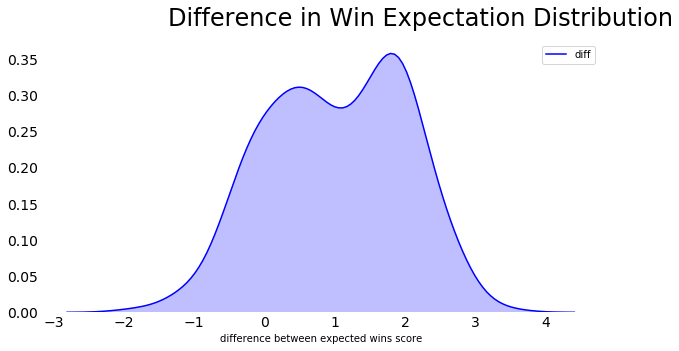

In [484]:
fig = plt.figure(figsize=(10, 5))

fig.text(x=0.30, y=0.92, s='Difference in Win Expectation Distribution', fontsize=24)

sns.kdeplot(df_tourney_all_games[df_tourney_all_games['tourn_round'] == 64]['diff'], shade=True, color='blue')
plt.box(False)
plt.xlabel('difference between expected wins score')
plt.tick_params(axis='both', which='both', length=0)
plt.tick_params(axis='both', which='major', labelsize=14);

In [485]:
df_tourney_all_games['diff'].describe()

count    945.000000
mean       0.829735
std        0.956254
min       -2.400000
25%        0.200000
50%        0.800000
75%        1.600000
max        3.500000
Name: diff, dtype: float64

I should probably normalize the data for diff, but without doing so we can see the average game has a difference of 1. Meaning that the better seeded team has an expected win total 1 higher than the worse seeded team.

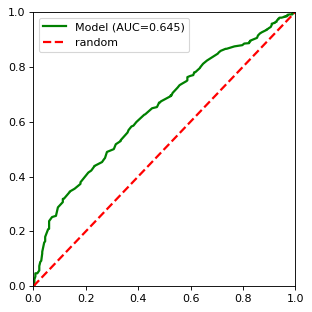

In [486]:
#make a graph of changing nn and threshold
def plot_ROC_curve():
    """
    Plots the ROC curve and calculate AUC

    :type plt: matplotlib.pyplot
    """
    plt.figure(figsize=(4, 4), dpi=80)
    scores = df_tourney_all_games['diff']
    upsets = df_tourney_all_games['upset']


    tpr, fpr, treshold = roc_curve(upsets, scores)
    roc_auc = auc(fpr, tpr)

    roc_label = '{} (AUC={:.3f})'.format('Model', roc_auc)
    

    plt.plot(fpr, tpr, color='green', linewidth=2, label=roc_label)
    x = [0.0, 1.0]
    plt.plot(x, x, linestyle='dashed', color='red', linewidth=2, label='random')
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 1.0)
    plt.legend(fontsize=10, loc='best')
    plt.tight_layout()
    
plot_ROC_curve()